In [1]:
# Observation 1: Max temperatures increase closer to the equator, 
#                although the highest max temperatures are between 
#                the 20 and 40 degree latitudes
# Observation 2: Cities with lower percent humidity tend to fall 
#                either near -20 degrees or 20 degrees latitude
# Observation 3: Cities with the highest wind speeds tend to be 
#                farther from the equator, around 60 and -40 
#                degrees latitude

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

## Perform API Calls

In [4]:
# # Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
# set up lists to hold response info
cloudiness = []
country = []
date = []
humidity = []
lat = [] 
lng = []
max_temp = []
wind_speed = []
new_city = []

# loop through each city in cities
for city in cities:
    
    # set try and except to elimate cities that return an error
    try:
        response = requests.get(query_url + city.replace(' ', '%20'), allow_redirects=False)
        response_json = response.json()
        print(json.dumps(response_json, indent=4, sort_keys=True))
    except:
        pass
        
    try:
        cloudiness.append(response_json["clouds"]["all"])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        humidity.append(response_json['main']['humidity'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        wind_speed.append(response_json['wind']['speed'])
        new_city.append(response_json['name'])
    except KeyError:
        pass

In [6]:
# create a data frame from cities
weather_dict = {
    "City": new_city,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}


weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,0,ZA,1530997200,87,-33.93,18.42,48.20,1.12
1,Busselton,0,AU,1531001235,100,-33.64,115.35,53.41,15.23
2,Airai,0,TL,1531001582,86,-8.93,125.41,57.28,1.92
3,Mahebourg,40,MU,1530997200,83,-20.41,57.70,69.80,2.24
4,Zyryanka,0,RU,1531001253,65,65.73,150.89,73.66,4.94


In [7]:
len(new_city)

559

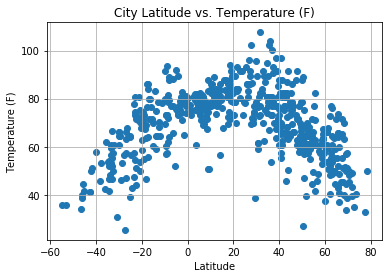

In [8]:
# Latitude vs. Temperature (F)

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatVsTemp.png")

# Show plot
plt.show()

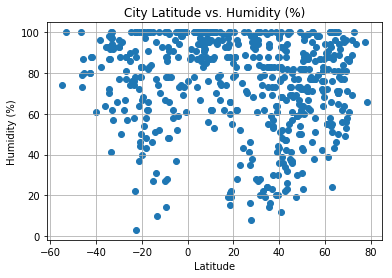

In [9]:
# Latitude vs. Humidity (%)

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatVsHumidity.png")

# Show plot
plt.show()

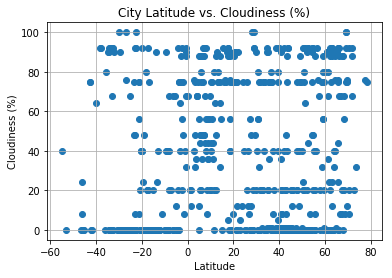

In [10]:
# Latitude vs. Cloudiness (%

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatVsCloudiness.png")

# Show plot
plt.show()

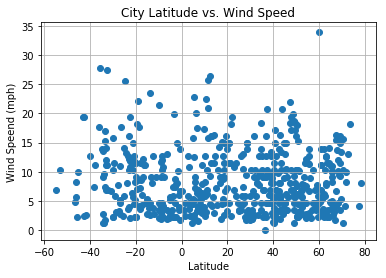

In [11]:
# Latitude vs. Wind Speed

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speend (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatVsWind.png")

# Show plot
plt.show()